<center><img src="img/EdTech_logo.png" style="width: 500px;"/></center>

Notre start-up de la EdTech, nommée **academy**, propose des contenus de formation en ligne pour un public de niveau lycée et université. Dans le cadre de notre projet d’expansion à l’international de l’entreprise, nous avons réalisé une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer sur ce projet.  

**Les objectifs sont :**
- Déterminer les pays avec un fort potentiel de clients pour nos services.
- Évaluer l’évolution de ce potentiel de clients.
- Les pays dans lesquels l'entreprise doit opérer en priorité.


**Les données :**

Les données que nous utiliserons proviennent de la Banque mondiale **The World Bank** “EdStats All Indicator Query” disponible à l'adresse suivante :  https://datacatalog.worldbank.org/dataset/education-statistics . Elle répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation..

Nous disposons de 5 fichiers :

<center><img src="img/Vue_ens_fichiers.png" style="width: 1000px;"/></center>

**Les indicateurs :**

Pour répondre à nos objectifs, nous allons choisir des indicateurs qui pourront apporter une aide dans la segmentation des populations. Nous choisissons 3 axes :
- Population étudiante
- PIB moyen (financement des études)
- Connectivité à internet
!!! A Développer

Nous allons donc :  
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

---

# Importation des librairies

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

In [2]:
# Versions 
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


In [3]:
%%html
<style>
    table {float:left}
</style>

---

# Importation des données

## Données EdStatsData

EdStatsData contient des valeurs par indicateurs, par an et par pays.

In [4]:
df_stats = pd.read_csv('data/EdStatsData.csv')
df_stats.sample(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
468481,"Korea, Dem. People’s Rep.",PRK,TIMSS: Female 4th grade students reaching the advanced international benchmark of mathematics achievement (%),LO.TIMSS.MAT4.ADV.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788951,Tajikistan,TJK,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Dangme. 2nd Grade,LO.EGRA.CWPM.ZERO.DAN.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Description des données

| Variables | Définition |
| --- | --- |
| Country Name | Nom du pays (ou de la région) |
| Country Code | Code du pays |
| Indicator Name | Nom de l'indicateur |
| Indicator Code | Code de l'indicateur |
| 1970-2100 | Valeurs par années |
| Unnamed: 69 | Valeurs nulles |

In [5]:
print("")
print("EdStatsData")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats.shape[0],df_stats.shape[1]))

duplicates = df_stats.duplicated(subset=["Country Code","Indicator Code"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_stats['Country Code'].unique())))
print("{} indicateurs uniques.".format(len(df_stats['Indicator Code'].unique())))
print("")


EdStatsData
----------------------------------
886930 entrées et 70 variables.
Absence de données dupliquées.
242 Country Code référencés.
3665 indicateurs uniques.



### Données manquantes

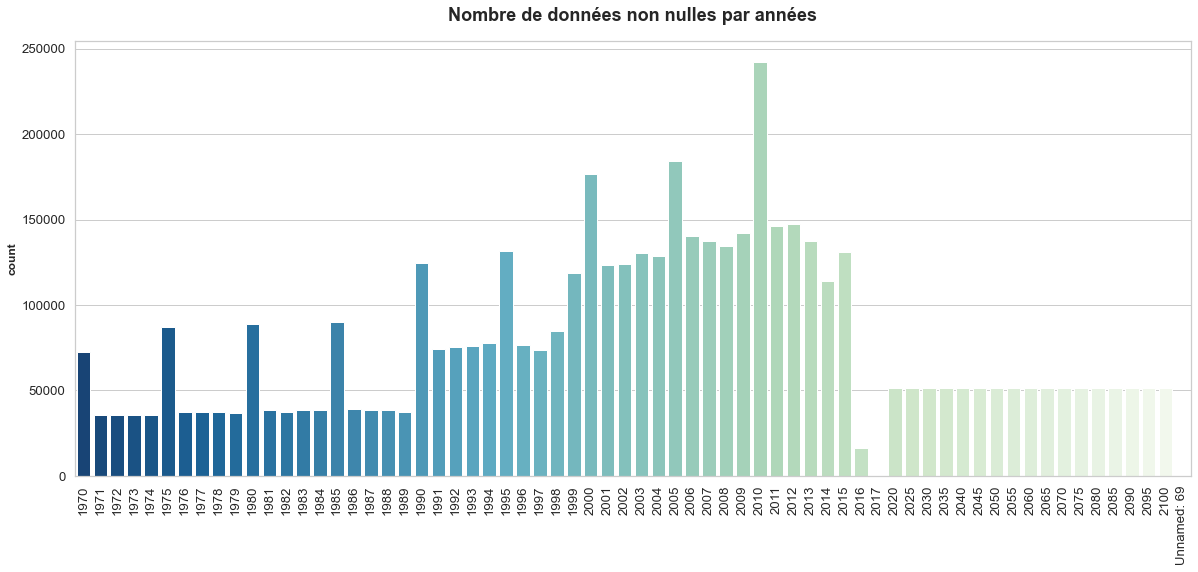

In [6]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df_stats, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Les années 2016 et 2017 ne présente pas un nombre de données suffisantes. Les années de 2020 à 2100 semblent être des données prédictives.
> Nous allons garder comme plage d'année **2000 à 2015** au vu du nombre de leurs valeurs nulles.  
> La collonne **Unnamed: 69** n'apporte pas d'informations, nous allons la supprimer.

## Données EdStatsSeries

EdStatsSeries contient des informations sur les indicateurs. Nous allons voir quelles informations peuvent être retenus pour nous aider dans le traitement de nos indicateurs.

In [7]:
df_stats_series = pd.read_csv('data/EdStatsSeries.csv')
df_stats_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Description des données

In [8]:
df_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [9]:
print("")
print("EdStatsSeries")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats_series.shape[0],df_stats_series.shape[1]))

duplicates = df_stats_series.duplicated(subset=["Series Code"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("Nombre de Topic : {}".format(len(df_stats_series['Topic'].unique())))


EdStatsSeries
----------------------------------
3665 entrées et 21 variables.
Absence de données dupliquées.
Nombre de Topic : 37


### Données manquantes

Nous gardons les colonnes qui contiennet suffisament de données.

In [10]:
df_stats_series_selected = df_stats_series.drop(columns = df_stats_series.loc[:,'Unit of measure':'General comments'])
df_stats_series_selected = df_stats_series_selected.drop(columns=df_stats_series_selected.loc[:,'Statistical concept and methodology':'Unnamed: 20'])

In [11]:
df_stats_series_selected.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


## Données EdStatsCountry

In [12]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


### Description des données

In [13]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [14]:
print("")
print("EdStatsCountry")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country.shape[0],df_country.shape[1]))

duplicates = df_country.duplicated(subset=["Country Code"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country['Country Code'].unique())))


EdStatsCountry
----------------------------------
241 entrées et 32 variables.
Absence de données dupliquées.
241 Country Code référencés.


### Données manquantes

In [15]:
df_country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

> Nous observons qu'il y a 27 valeurs manquantes pour la variable "Region". Le nombre d'entrées est de 241, hors selon l'ONU, il y a 197 Etats dans le monde. La liste des "Country" sans nom de région, semblerai donc indiquer qu'il s'agit de régions.

**Données de régions :**

In [16]:
list_region_income_group = df_country[df_country['Region'].isnull()]['Short Name'].unique()

list_income_groups = [x for x in list_region_income_group if x.endswith('income')]
list_regions = [x for x in list_region_income_group if not x.endswith('income')]

print("")
print("Il y a {} 'Country Code' référencés.".format(len(df_country['Country Code'].unique())))
print("Nombre d'entreés ne possédant pas de région : {}".format(len(list_region_income_group)))

print("")
print("Liste des income levels :")
print("----------------------------------")
print(*list_income_groups, sep = "\n")

print("")
print("Liste des régions :")
print("----------------------------------")
print(*list_regions, sep = "\n")


Il y a 241 'Country Code' référencés.
Nombre d'entreés ne possédant pas de région : 27

Liste des income levels :
----------------------------------
High income
Low income
Lower middle income
Low & middle income
Middle income
Upper middle income

Liste des régions :
----------------------------------
Arab World
East Asia & Pacific (developing only)
East Asia & Pacific (all income levels)
Europe & Central Asia (developing only)
Europe & Central Asia (all income levels)
Euro area
European Union
Gibraltar
Heavily indebted poor countries (HIPC)
Latin America & Caribbean (developing only)
Latin America & Caribbean (all income levels)
Least developed countries: UN classification
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
North America
Nauru
OECD members
South Asia
Sub-Saharan Africa (developing only)
Sub-Saharan Africa (all income levels)
World


In [17]:
country_by_income_grp = df_country.groupby('Income Group')[['Short Name']].count().reset_index()
country_by_income_grp = country_by_income_grp.sort_values(by='Short Name', ascending=False)

country_by_region = df_country.groupby('Region')[['Short Name']].count().reset_index()
country_by_region = country_by_region.sort_values(by='Short Name', ascending=False)

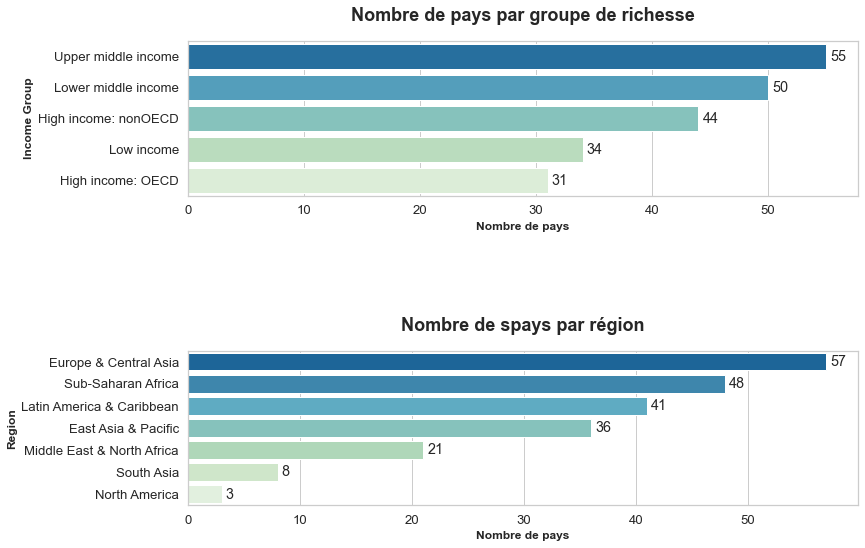

In [18]:
plt.subplot(2,1,1)
ax = sns.barplot(data=country_by_income_grp, x="Short Name", y="Income Group", palette="GnBu_r")
ax.set_title('Nombre de pays par groupe de richesse')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplot(2,1,2)
ax = sns.barplot(data=country_by_region, x="Short Name", y="Region", palette="GnBu_r")
ax.set_title('Nombre de spays par région')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplots_adjust(top=1.2, hspace = 1, wspace = 1)
plt.show()

> Nous pouvons utiliser les données **EdStatsCountry** pour segementer nos données **EdStatsData** par pays et par régions.

## Données EdStatsCountrySeries

In [19]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


### Description des données

In [20]:
df_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [21]:
print("")
print("EdStatsCountry-Series")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country_series.shape[0],df_country_series.shape[1]))

duplicates = df_country_series.duplicated(subset=["CountryCode"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country_series['CountryCode'].unique())))

list_country_series_code = list(df_country_series['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_country_series_code)))


EdStatsCountry-Series
----------------------------------
613 entrées et 4 variables.
Présence de données dupliquées.
211 Country Code référencés.
21 indicateurs uniques.


In [22]:
print(list_country_series_code)

['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO', 'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN']


**Nombre d'indicateur par pays :**

In [23]:
countries_by_indicator = df_country_series.groupby('SeriesCode').count().reset_index()
countries_by_indicator = countries_by_indicator.sort_values(by='CountryCode', ascending=False)

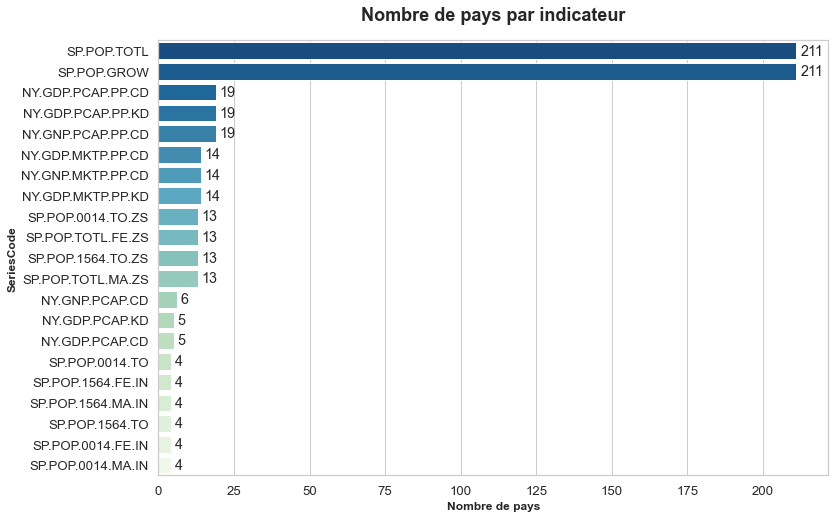

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title('Nombre de pays par indicateur')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> Nous garderons pour notre analyse les indicateurs **SP.POP.TOTL** et **SP.POP.GROW**.

### Données manquantes

In [25]:
list_country_series_code.remove('SP.POP.TOTL')
list_country_series_code.remove('SP.POP.GROW')

df_stats_selected = df_stats[~df_stats['Indicator Code'].isin(list_country_series_code)]

## Données EdStatsFootNote

In [26]:
df_foot_note = pd.read_csv('data/EdStatsFootNote.csv')
df_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### Description des données

In [27]:
df_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [28]:
print("")
print("EdStatsFootNote")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_foot_note.shape[0],df_foot_note.shape[1]))

duplicates = df_foot_note.duplicated(subset=["CountryCode"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_foot_note['CountryCode'].unique())))

list_foot_note_series_code = list(df_foot_note['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_foot_note_series_code)))


EdStatsFootNote
----------------------------------
643638 entrées et 5 variables.
Présence de données dupliquées.
239 Country Code référencés.
1558 indicateurs uniques.


### Répartition des données

In [29]:
df_foot_note_by_year = df_foot_note
df_foot_note_by_year['year_formated'] = df_foot_note_by_year['Year'].apply(lambda x : x[-4:]).astype('int')
df_foot_note_by_year = df_foot_note_by_year.groupby('year_formated').count().reset_index()

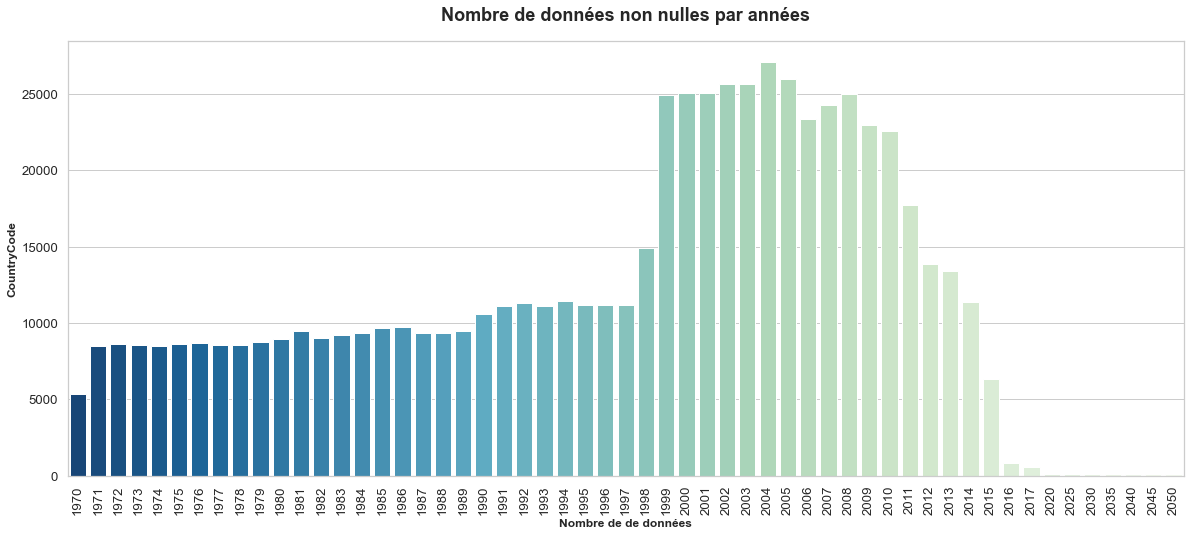

In [30]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="year_formated", y="CountryCode", data=df_foot_note_by_year, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.set(xlabel='Years')
ax.set(xlabel='Nombre de de données')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

> ?????

# Nettoyage des données et sélection des indicateurs

On fusionne les données de EdStatsData avec EdStatsSeries. 

In [31]:
df_stats_series_selected.rename(columns = {'Series Code' : 'Indicator Code'}, inplace=True)
df_stats_selected = df_stats_selected.merge(df_stats_series_selected, how='inner', on='Indicator Code')

df_stats_selected = df_stats_selected.drop(columns=['Indicator Name_y'])
df_stats_selected.rename(columns = {'Indicator Name_x' : 'Indicator Name'}, inplace=True)

## Par années

Nous avons sélectionné les années de 2000 à 2015 pour les données EdStatsData :

In [32]:
df_stats_selected = df_stats_selected.drop(columns = df_stats_selected.loc[:,'1970':'1999'])
df_stats_selected = df_stats_selected.drop(columns=df_stats_selected.loc[:,'2016':'Unnamed: 69'])

> Nous avons maintenant des données sur une période ciblée. Il y a cependant un grand nombre d'incateurs par Country Code et de valeurs manquantes. Nous devons sélectionner les indicateurs les plus pertinents qui participerons à répondre à nos problématiques.

In [33]:
years_selected = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009",
                  "2010","2011","2022","2033","2014","2015"]

## Par par genre

En faisant une recherche sur les indicateurs, on remarque que ces derniers sont déclinés en sous-indicateurs :
- par genre (femme ou homme)
- par tranche d'âge
- par régions

Par genre :
- contiennent : "F", "M", "FE", MA"
- se terminent par : "F", "M", "FE", "GPI", "MA", "FE.ZS", "MA.ZS"

In [34]:
print('Nombre de lignes dans les EdStatsData sur la prériode sélectionnée : {}'.format(
    len(df_stats_selected['Indicator Code'].unique())))

df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'].str.endswith((
    '.F','.M','.GPI','FE','MA','FE.ZS','MA.ZS'))]

#df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'].str.contains(
#    ".F.|.M.|.FE.|.MA.", regex=True)]

print('Nombre de lignes après traitement : {}'.format(len(df_stats_selected['Indicator Code'].unique())))

Nombre de lignes dans les EdStatsData sur la prériode sélectionnée : 3593
Nombre de lignes après traitement : 2289


## Par âge

Nous allons cibler les indicateurs d'âge sur une population jeune en dessous de 25 ans.

Par exemple :

In [35]:
df_temp_age = df_stats_selected[df_stats_selected['Indicator Code'].str.contains('4549')]
df_temp_age = df_temp_age['Long definition'].unique()
df_temp_age[0]

'Average years of primary schooling, 45-49, total is the average years of primary education completed among people age 45-49.'

Filtre :

In [36]:
age_range_to_drop = '15UP|25UP|2529|3034|3539|4044|4549|5054|5559|6064|6569|7074|75UP'

df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                            .str.contains(age_range_to_drop, regex=True)]

print('Nombre de lignes après traitement : {}'.format(len(df_stats_selected['Indicator Code'].unique())))

Nombre de lignes après traitement : 2090


Indicateurs à garder ?
- SP.POP.1518.TO.UN
- SP.POP.1925.TO.UN

In [37]:
df_temp_age = df_stats_selected[df_stats_selected['Indicator Code'].str.endswith('UN')]
df_temp_age = df_temp_age['Indicator Code'].unique()
print(df_temp_age)

['SP.POP.AG00.FE.UN' 'SP.POP.AG00.MA.UN' 'SP.POP.AG00.TO.UN'
 'SP.POP.AG01.FE.UN' 'SP.POP.AG01.MA.UN' 'SP.POP.AG01.TO.UN'
 'SP.POP.AG10.FE.UN' 'SP.POP.AG10.MA.UN' 'SP.POP.AG10.TO.UN'
 'SP.POP.AG11.FE.UN' 'SP.POP.AG11.MA.UN' 'SP.POP.AG11.TO.UN'
 'SP.POP.AG12.FE.UN' 'SP.POP.AG12.MA.UN' 'SP.POP.AG12.TO.UN'
 'SP.POP.AG13.FE.UN' 'SP.POP.AG13.MA.UN' 'SP.POP.AG13.TO.UN'
 'SP.POP.AG14.FE.UN' 'SP.POP.AG14.MA.UN' 'SP.POP.AG14.TO.UN'
 'SP.POP.AG15.FE.UN' 'SP.POP.AG15.MA.UN' 'SP.POP.AG15.TO.UN'
 'SP.POP.AG16.FE.UN' 'SP.POP.AG16.MA.UN' 'SP.POP.AG16.TO.UN'
 'SP.POP.AG17.FE.UN' 'SP.POP.AG17.MA.UN' 'SP.POP.AG17.TO.UN'
 'SP.POP.AG18.FE.UN' 'SP.POP.AG18.MA.UN' 'SP.POP.AG18.TO.UN'
 'SP.POP.AG19.FE.UN' 'SP.POP.AG19.MA.UN' 'SP.POP.AG19.TO.UN'
 'SP.POP.AG02.FE.UN' 'SP.POP.AG02.MA.UN' 'SP.POP.AG02.TO.UN'
 'SP.POP.AG20.FE.UN' 'SP.POP.AG20.MA.UN' 'SP.POP.AG20.TO.UN'
 'SP.POP.AG21.FE.UN' 'SP.POP.AG21.MA.UN' 'SP.POP.AG21.TO.UN'
 'SP.POP.AG22.FE.UN' 'SP.POP.AG22.MA.UN' 'SP.POP.AG22.TO.UN'
 'SP.POP.AG23.FE.UN' 'SP

## Par catégories (Topic)

In [38]:
list_topics = df_stats_selected['Topic'].unique()
print(*list_topics, sep = "\n")

Secondary
Primary
Literacy
Teachers
EMIS
Expenditures
Attainment
Education Equality
Background
Learning Outcomes
Early Childhood Education
Tertiary
Post-Secondary/Non-Tertiary
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
Pre-Primary
Infrastructure: Communications
Social Protection & Labor: Labor force structure
Health: Mortality
Health: Population: Dynamics
Population
Health: Population: Structure
Health: Risk factors
Early Child Development (SABER)
Education Management Information Systems (SABER)
Engaging the Private Sector (SABER)
School Autonomy and Accountability (SABER)
School Finance (SABER)
School Health and School Feeding (SABER)
Student Assessment (SABER)
Teachers (SABER)
Tertiary Education (SABER)
Workforce Development (SABER)
Laber
Social Protection & Labor: Unemployment


### Catégories hors sujet

Par rapport à notre contexte, certains Topic ne vont pas nous apporter d'informations. On retrouve des catégories concernant la santé, l'égalité ou les protections sociales.

In [39]:
list_topic_to_remove = [
    'Education Equality',
    'Economic Policy & Debt: Purchasing power parity',
    'Pre-Primary',
    'Health: Risk factors',
    'Health: Mortality',
    'Social Protection & Labor: Labor force structure'
    'Social Protection & Labor: Unemployment',
    'Health: Population: Structure',
    'Health: Population: Dynamics'
]

df_stats_selected = df_stats_selected[~df_stats_selected['Topic'] \
                                                    .isin(list_topic_to_remove)]

In [40]:
data_by_topic = df_stats_selected.groupby('Topic')[[
    "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].count().reset_index()
data_by_topic['not_null_percent'] = data_by_topic.sum(axis=1) / (data_by_topic.shape[1] * 242)
data_by_topic = data_by_topic.sort_values(by='not_null_percent', ascending=False)
data_by_topic

,Topic,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,not_null_percent
14,Population,39017,39241,39452,39448,39272,39263,38542,37479,37475,37491,37446,37440,37415,37407,28065,36663,146.114730
20,Secondary,10479,10889,11164,10774,11509,11629,11295,11717,11934,12132,11913,12259,12046,11862,10137,2748,42.412980
16,Primary,7853,7904,7973,7808,8211,8366,8099,8569,8772,8919,9215,9297,9501,8812,7119,2407,31.313807
26,Tertiary,4698,4744,5003,5125,5380,5209,5193,5526,5838,5846,6088,6300,6670,6949,5830,1387,20.852212
9,Expenditures,4075,4376,5075,4206,5174,4878,4833,5329,5794,6094,6670,6694,5727,5024,2834,613,18.812834
24,Teachers,2809,2818,2767,2767,2694,2615,2619,2784,2817,2900,3043,3189,3158,3418,3353,1806,11.073651
0,Attainment,3678,259,194,122,331,3857,571,639,731,706,16876,830,770,745,874,12903,10.716091
12,Learning Outcomes,1472,409,0,3377,6,18,3774,2398,57,3310,174,2827,4905,549,1112,6036,7.395236
4,Early Childhood Education,956,927,1029,927,1073,1058,1069,1135,1142,1166,1204,1260,1250,1365,1302,335,4.180360
6,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,439,441,446,446,449,449,450,450,447,444,446,446,440,441,428,425,1.722654


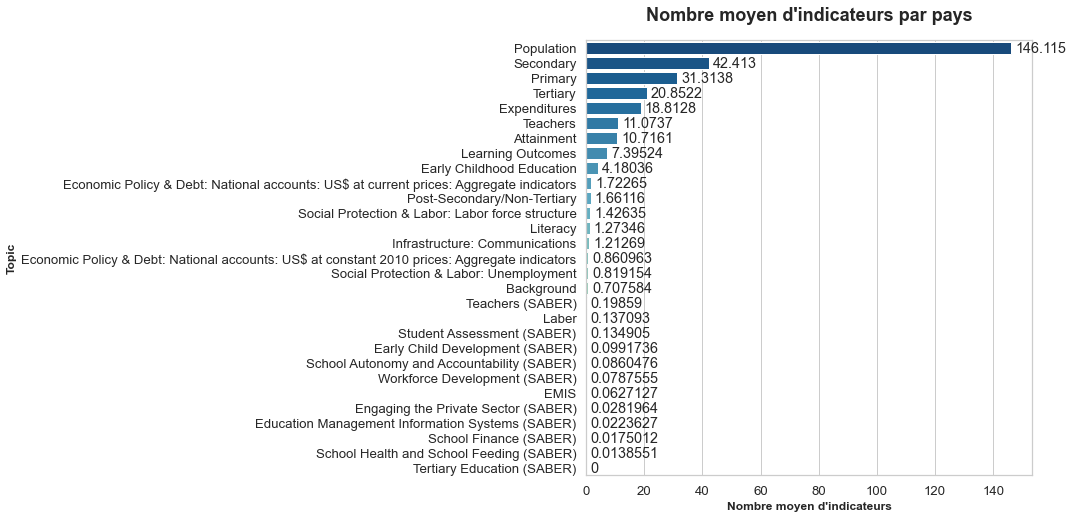

In [41]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=data_by_topic, x="not_null_percent", y="Topic", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

### Attainment

<center><img src="img/Attainment_topic.png"/></center>

- **Suppression des données UIS :**

Les données IUS concernent les plus de 25ans et ne corresponds pas à notre clientèle cible. Nous n'allons donc pas les garder.

In [42]:
df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                                                    .str.contains("UIS")]

- **Supression des indicateurs prédis :**

Les indicateurs commençant par PRJ sont des projections que nous allons aussi supprimer. Exemple :

In [43]:
df_temp_prj = df_stats_selected[df_stats_selected['Topic']=='Attainment']
df_temp_prj = df_temp_prj[df_temp_prj['Indicator Code'].str.startswith('PRJ')]
df_temp_prj = df_temp_prj['Long definition'].unique()
df_temp_prj[0]

"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"

In [44]:
df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                                                    .str.startswith('PRJ')]

### Infrastructure: Communications

In [45]:
df_temp_com = df_stats_selected[df_stats_selected['Topic'] \
                                   =='Infrastructure: Communications']
print("Nombre d'indicateur unique : {}".format(len(df_temp_com['Indicator Code'].unique())))

Nombre d'indicateur unique : 2


In [46]:
df_temp_com = df_temp_com.drop_duplicates(['Indicator Code'])
df_temp_com[["Indicator Code", "Long definition"]]

,Indicator Code,Long definition
322828,IT.NET.USER.P2,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."
491744,IT.CMP.PCMP.P2,Personal computers are self-contained computers designed to be used by a single individual.


> Nous gardons **IT.NET.USER.P2** qui est un indicateur sur l'utilisation d'internet car nos cours sont en lignes.

In [47]:
df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                                                    .str.contains("IT.CMP.PCMP.P2")]

### Learning Outcomes

In [48]:
df_temp_out = df_stats_selected[df_stats_selected['Topic']=='Learning Outcomes']
print("Nombre d'indicateur unique : {}".format(len(df_temp_out['Indicator Code'].unique())))

Nombre d'indicateur unique : 810


<center><img src="img/Learning_Outcomes_topic.png"/></center>

PISA ???

In [49]:
list_to_drop = "PISA|LLECE|PASEC|SACMEQ"
df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                                                    .str.contains(list_to_drop)]

### Economic Policy & Debt

In [50]:
economic_topic = [
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
]

df_temp_eco = df_stats_selected[df_stats_selected['Topic'].isin(economic_topic)]

In [51]:
df_temp_eco = df_temp_eco.groupby('Indicator Code')[[
    "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].count().reset_index()
df_temp_eco['not_null_percent'] = df_temp_eco.sum(axis=1) / (df_temp_eco.shape[1] * 242)
df_temp_eco = df_temp_eco.sort_values(by='not_null_percent', ascending=False)
df_temp_eco

,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,not_null_percent
0,NY.GDP.MKTP.CD,224,224,228,228,229,229,230,229,228,227,228,228,224,225,219,218,0.879436
1,NY.GDP.MKTP.KD,217,218,223,223,223,223,223,223,223,223,227,223,221,221,216,215,0.860963
2,NY.GNP.MKTP.CD,215,217,218,218,220,220,220,221,219,217,218,218,216,216,209,207,0.843218


In [52]:
economic_topic = [
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
]

for topic in economic_topic:
    print("")
    print("-------------------------------------------------------------")
    print(topic)
    print("")
    df_temp_eco = df_stats_selected[df_stats_selected['Topic']==topic]
    print("Nombre d'indicateur unique : {}".format(len(df_temp_eco['Indicator Code'].unique())))

    df_temp_eco = df_temp_eco.drop_duplicates(['Indicator Code'])
    print(df_temp_eco[["Indicator Code", "Long definition"]])


-------------------------------------------------------------
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators

Nombre d'indicateur unique : 2
        Indicator Code  \
294756  NY.GDP.MKTP.CD   
294998  NY.GNP.MKTP.CD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Long definition  
294756  GDP at purchaser's prices is the sum of gross value added by all resident p

> On va retenir l'indicateur économique **NY.GDP.PCAP.KD** revenu national brut (RNB) par habitant.

In [53]:
list_to_drop = "NY.GDP.MKTP.CD|NY.GDP.PCAP.CD|NY.GNP.MKTP.CD|NY.GDP.MKTP.KD|NY.GNP.PCAP.CD"
df_stats_selected = df_stats_selected[~df_stats_selected['Indicator Code'] \
                                                    .str.contains(list_to_drop)]

---

In [54]:
#df_temp2 = df_stats_series_selected[df_stats_series_selected['Topic']=='Education Equality']
#df_temp2 = df_temp2['Long definition'].unique()
#df_temp2[30]

## Suppression des lignes vide

In [55]:
list_columns = list(df_stats_selected.loc[:,"2000":"2015"])
df_to = df_stats_selected.dropna(how="all", subset=list_columns)
df_stats_selected.shape[0]

267410

In [56]:
a = list(df_stats_selected["Indicator Code"].unique())
print(len(a))

1105


> Après suppression des lignes vides, nous avons un jeu de données de ???? lignes.

## Taux d'informations par indicateurs

In [57]:
df_temp_ind = df_stats_selected.groupby('Indicator Code')[[
    "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]].count().reset_index()
df_temp_ind['not_null_percent'] = df_temp_ind.sum(axis=1) / (df_temp_ind.shape[1] * 242)
df_temp_ind = df_temp_ind.sort_values(by='not_null_percent', ascending=False)
df_temp_ind.head(50)

,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,not_null_percent
24,IT.NET.USER.P2,221,222,224,218,221,223,222,229,228,227,227,229,227,226,223,223,0.872630
1098,SP.SEC.UTOT.IN,215,217,219,219,219,219,219,220,220,221,220,221,221,221,222,201,0.849295
1092,SP.SEC.LTOT.IN,215,217,219,219,219,219,219,220,220,221,219,221,221,221,221,201,0.848809
1095,SP.SEC.TOTL.IN,215,217,219,219,219,219,219,220,220,221,219,220,220,220,221,201,0.848080
1085,SP.PRE.TOTL.IN,216,218,220,219,219,219,219,220,219,220,218,221,219,219,219,199,0.846864
1097,SP.SEC.UTOT.FE.IN,215,217,218,218,218,218,218,219,219,220,219,220,220,220,221,200,0.845892
1099,SP.SEC.UTOT.MA.IN,215,217,218,218,218,218,218,219,219,220,219,220,220,220,221,200,0.845892
1093,SP.SEC.LTOT.MA.IN,215,217,218,218,218,218,218,219,219,220,218,220,220,220,220,200,0.845406
1091,SP.SEC.LTOT.FE.IN,215,217,218,218,218,218,218,219,219,220,218,220,220,220,220,200,0.845406
1096,SP.SEC.TOTL.MA.IN,215,217,218,218,218,218,218,219,219,220,218,219,219,219,220,200,0.844677
